In [1]:
#Unigram and bigram code goes here

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
#Importing dataset
trainDf = pd.read_csv('train_processed.csv', sep = ',')
testDf = pd.read_csv('test_processed.csv', sep = ',')

In [4]:
trainDf.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [5]:
# c = trainDf[["0.1"]]
# c.head()

In [6]:
tweetsTrain = pd.DataFrame(trainDf)
tweetsTrain.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [7]:
trainTweetsProc = [] # Creating an empty list to store the data set above.
i = 0
while i < tweetsTrain.shape[0]:
    trainTweetsProc.append([tweetsTrain.iloc[i,1], tweetsTrain.iloc[i,2], tweetsTrain.iloc[i,3]]) # Adds each row to the list, excluding the first column of the data set.
    i += 1

trainTweetsP = pd.DataFrame(trainTweetsProc) # Casts the list to a data frame, which is cleaned.
trainTweetsP.head()

,0,1,2
0,1,0,USER_MENTION when a father is dysfunctional an...
1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð
4,5,0,factsguide society now motivation


In [8]:
tweetsTraining = trainTweetsP[[2]] # Extracts the tweets column from the clean data frame above.
tweetsTraining.head()

,2
0,USER_MENTION when a father is dysfunctional an...
1,USER_MENTION USER_MENTION thanks for lyft cred...
2,bihday your majesty
3,model i love u take with u all the time in urð
4,factsguide society now motivation


In [9]:
tweetTrainingList = [] # Creating an empty list to store the tweets.
i = 0
while i < tweetsTraining.shape[0]:
    tweetTrainingList.append(tweetsTraining.iloc[i,0]) # Adds each tweet to the list.
    i += 1

In [10]:
stringOfTrainTweets = " ".join(tweetTrainingList) # Joins the tweets together into one giant string, with a space between every two consecutive tweets.

In [46]:
stopWords = set(stopwords.words('english'))
tokens = word_tokenize(stringOfTrainTweets)
wordsFiltered = []

for w in tokens:
    if w not in stopWords:
        wordsFiltered.append(w)

In [11]:
#Creating Unigram

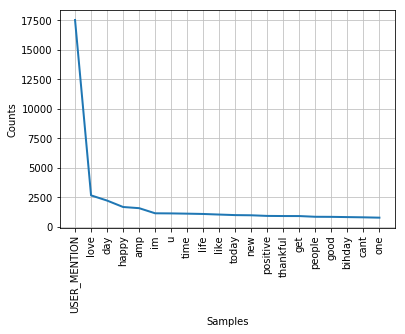

In [47]:
#Plotting unigram
# r = trainDf[["0.1"]]
# trainDf_string = trainDf.to_string()
#creating tokens
# tokens = word_tokenize(stringOfTrainTweets)
vocab = set(wordsFiltered)
frequencyDist = nltk.FreqDist(wordsFiltered)
data = sorted(frequencyDist,key=frequencyDist.__getitem__, reverse=True)
data[0:20]
frequencyDist.plot(20, cumulative=False)

In [13]:
# len(vocab) = 41571
# So, proportionally num. of sparse vector = 3440
#and num of dense vector = 20,650

In [14]:
sparseVector = data[0:3440]
denseVector = data[0:20650]

In [15]:
# def generate_ngrams(s, n):
    
#     # Replace all none alphanumeric characters with spaces
#     s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
#     # Break sentence in the token, remove empty tokens
#     tokens = [token for token in s.split(" ") if token != ""]
    
#     # Use the zip function to help us generate n-grams
#     # Concatentate the tokens into ngrams and return
#     ngrams = zip(*[token[i:] for i in range(n)])
#     return [" ".join(ngram) for ngram in ngrams]

In [16]:
# a = 'today was so cool. i did nothing. amazing, right?'

In [17]:
# generate_ngrams(a, n=2)

In [18]:
# b = 'time to go home! next time, we will go to the cinema. how does that sound? do you want to go to the cinema?'

In [19]:
# #Trial : To be del.
# tokens = [token for token in stringOfTrainTweets.split(" ") if token != ""]
# output = list(ngrams(tokens, 2))

In [50]:
output = []
i = 0
while i < len(tweetTrainingList):
    tokens1 = word_tokenize(tweetTrainingList[i])
    tweetFil = []
    for w in tokens1:
        if w not in stopWords:
            tweetFil.append(w)
    tokens2 = [token for token in tweetFil if token != ""]
    output.extend(list(ngrams(tokens2, 2)))
    i += 1

In [49]:
a = "the weather today is pleasant"
b = a.split(" ")
print(b)

['the', 'weather', 'today', 'is', 'pleasant']


In [ ]:
# output = []
# i = 0
# while i < len(tweetTrainingList):
#     tokens = [token for token in tweetTrainingList[i].split(" ") if token != ""]
#     output.extend(list(ngrams(tokens, 2)))
#     i += 1

In [37]:
output[0:10]

[('USER_MENTION', 'when'),
 ('when', 'a'),
 ('a', 'father'),
 ('father', 'is'),
 ('is', 'dysfunctional'),
 ('dysfunctional', 'and'),
 ('and', 'is'),
 ('is', 'so'),
 ('so', 'selfish'),
 ('selfish', 'he')]

In [38]:
bigrams = set(output)
frequency_dist = nltk.FreqDist(output)
data = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
data[0:20]

[('USER_MENTION', 'USER_MENTION'),
 ('i', 'am'),
 ('in', 'the'),
 ('to', 'be'),
 ('of', 'the'),
 ('all', 'the'),
 ('for', 'the'),
 ('fathers', 'day'),
 ('i', 'love'),
 ('to', 'the'),
 ('to', 'do'),
 ('thankful', 'for'),
 ('USER_MENTION', 'i'),
 ('am', 'thankful'),
 ('you', 'will'),
 ('thankful', 'positive'),
 ('the', 'time'),
 ('to', 'see'),
 ('on', 'the'),
 ('this', 'is')]

In [39]:
len(data)

182648

In [40]:
len(bigrams)

182648

In [41]:
bigramsVocab = data[0:940]

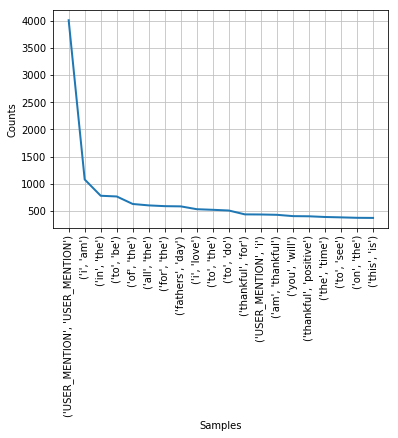

In [42]:
frequency_dist.plot(20, cumulative=False)

# Mihir

# Vaibhav